In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

In [2]:
"""
The following graphs will be static for testing. 
Later on I will animate these graphs to have a visual 
representation of the rate of change. The annimation 
itself would be a related rate -- could comment on this 
during the lesson.

To maintain each cell selfconsistent, I will redefine
common parameters such as the x array, the parabola, 
midpoints, ect. 
"""

def parabola(x):
    return (1/4)*x*x -2

#define the functions for r and its derivative
def rOfX(x):
    return np.sqrt((1/16)*x**4 - (3/2)*x**2 + 25)

def rPrime(x):
    return ((1/8)*x**3 - (3/2)*x)/rOfX(x)

MovieWriter Pillow unavailable; using Pillow instead.


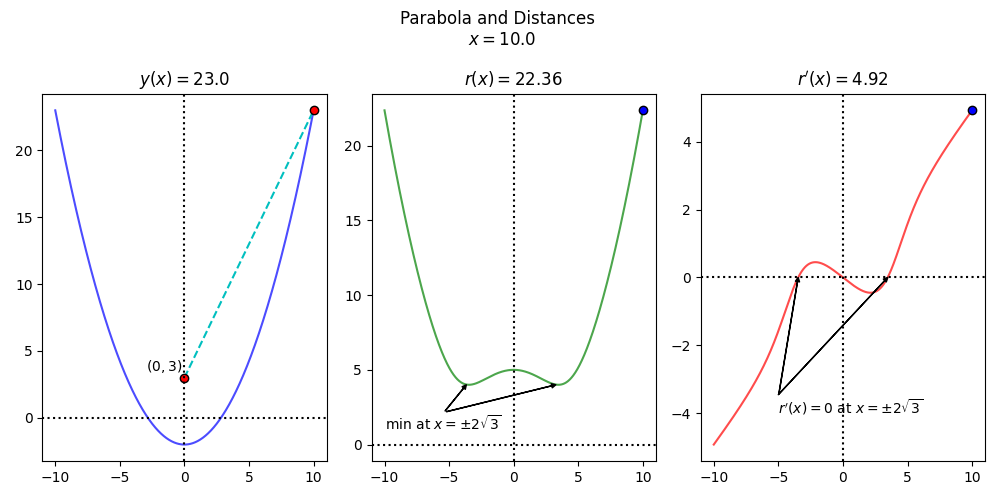

In [3]:
"""
In this cell I will create an animation of the plots 
above as we vary the x coordinate from which we're 
measuring distance. I will again redefine variables
for selfconsistency.
"""

x = np.linspace(-10, 10, 1000)
x0 = 0
y0 = 3
x1 = 9
y1 = parabola(x1)
x2 = -9
y2 = parabola(x2)
xmid1 = (x1+x0)/2
ymid1 = (y1+y0)/2
xmid2 = (x2+x0)/2
ymid2 = (y2+y0)/2

#below we find the coordinates for the extrema
xmin1 = -2*np.sqrt(3)
xmin2 = 2*np.sqrt(3)
rmin = rOfX(xmin1)
rp0 = 0
rp1 = rPrime(xmin1)
rp2 = rPrime(xmin2)

"""
Now we need to consider the number of frames needed 
for the animation. If we aim for a 30fps frame-rate in the 
interval (-10,10), this turns out to be around 120 frames 
or x values. This would give us 5 seconds of animation.
"""

#define the x for the animation
xAni = np.linspace(-10, 10, 120) #the step is given by the interval divided by 120

#evaluate the functions for each xAni
yAni = parabola(xAni)
rAni = rOfX(xAni)
rPAni = rPrime(xAni)


fig, ax = plt.subplots(1, 3, figsize=(10,5))

#plot all the static functions as above, what will be updated are 
#just the moving coordinates
ax[0].plot(x, parabola(x), color='b', alpha=0.7)


#plot the distance
ax[1].plot(x, rOfX(x), color='g', alpha=0.7)

#plot the derivative
ax[2].plot(x, rPrime(x), color='r', alpha=0.7)

#empty arrays to update coordinate positions
coor0, = ax[0].plot([], [], color='c',
                    marker='o', markerfacecolor='r',
                    markeredgecolor='k', ls='--')
coor1, = ax[1].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')
coor2, = ax[2].plot([], [], color='c',
                    marker='o', markerfacecolor='b',
                    markeredgecolor='k', ls='--')

#template for printing the coordinate values on plot
title0 = fig.suptitle("")
title1 = ax[0].set_title("")
title2 = ax[1].set_title("")
title3 = ax[2].set_title("")

#annotations and text
ax[0].text(x0-3, y0+0.5, '$(0, 3)$')
#ax[0].text(xmid-1, ymid+0.2, '$r$')
ax[1].annotate(
    'min at $x=\\pm 2\\sqrt{3}$', 
    xy=(xmin1-.2, rmin), 
    xytext=(-10, 1),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[1].annotate(
    '', 
    xy=(xmin2-.2, rmin), 
    xytext=(-5.2, 2.2),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)

ax[2].annotate(
    "$r'(x)= 0$ at $x=\\pm 2\\sqrt{3}$", 
    xy=(xmin1, rp1), 
    xytext=(-5, -4),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)
ax[2].annotate(
    '', 
    xy=(xmin2, rp2), 
    xytext=(-5, -3.45),
    arrowprops=dict(facecolor='black', width=0.1,
                    headwidth=3, headlength=3)
)


for a in ax:
    a.axhline(0, ls=':', color='k')
    a.axvline(0, ls=":", color='k')

def update(i):

    thisx0 = [x0, xAni[i]]
    thisy = [y0, yAni[i]]
    thisx = [xAni[i]]
    thisr = [rAni[i]]
    thisrp = [rPAni[i]]

    coor0.set_data(thisx0, thisy)
    coor1.set_data(thisx, thisr)
    coor2.set_data(thisx, thisrp)

    title0.set_text('Parabola and Distances \n $x={}$'.format(np.round(xAni[i],2)))
    title1.set_text('$y(x)= {}$'.format(np.round(yAni[i], 2)))
    title2.set_text('$r(x) = {}$'.format(np.round(rAni[i], 2)))
    title3.set_text("$r'(x) = {}$".format(np.round(rPAni[i], 2)))

    fig.tight_layout()


    ret = coor0, coor1, coor2, title0, title1, title2, title3
    return ret

ani = animation.FuncAnimation(
    fig, update, len(xAni), interval=167, blit=True
)
ani.save('parabola-distance.gif', writer='Pillow', fps=30)